# Python libraries
- Scientific Computation
  - NumPy
  - SciPy: functions for linear algebra, optimization, integration and statistics (built on top of NumPy)
  - Statsmodels
  - Pandas: "relational" data. Series (one dimension) and Data Frames (two dimensional)
- Data Visualization
  - MatplotLib
  - Seaborn: complimentary to Matplotlib. targets statistical data visualizations
- Machine Learning
  - Scikit-Learn
- Deep Learning (Keras / TensorFlow)
  - TensorFlow: data flow graph computations
  - Keras: neural networks. Can use Theano or TensorFlow

# Pandas

In [41]:
import pandas as pd

df = pd.read_csv('Data/ACS_16_5YR_B24011_with_ann.csv', usecols=['GEO.id', 'GEO.id2'], encoding='latin-1')
# df = df.drop(0)
df.head(2)

,GEO.id,GEO.id2
0,Id,Id2
1,0500000US01001,01001


In [6]:
# excel sheet names
workbook = pd.ExcelFile('Data/Yelp_Selected_Businesses.xlsx')
workbook.sheet_names

['Biz_id_RESDU',
 'Biz_id_4JNXU',
 'Biz_id_YJ8lj',
 'Biz_id_ujHia',
 'Biz_id_na4Th']

In [11]:
# save results
df.to_csv('NewSavedView.csv', index=False) #Notice how we have to pass index=False if we do not want it included in our output

## Series and Data Frames

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('Data/turnstile_180901.txt')
print(len(df))
# df.info()

4848


In [86]:
def contains_n(text):
    return 'N' in text

df['On_N_Line'] = df.LINENAME.map(contains_n)

In [87]:
df.columns

# change column data types
df.ENTRIES = df.ENTRIES.astype(int)
df.ENTRIES.dtype

# dates
# iloc slicing series / dataframes
print(df.DATE.iloc[0])
# pd.to_datetime(df.DATE, format='%m/%d/%Y').head()
pd.to_datetime(df.DATE).head()
# dt methods
df.DATE = pd.to_datetime(df.DATE)
df.DATE.dt.day_name().head()

08/25/2018


0    Saturday
1    Saturday
2    Saturday
3    Saturday
4    Saturday
Name: DATE, dtype: object

In [88]:
# rename / drop columns, set new index
df = df.rename(columns = {'DATE': 'date'})
# df = df.drop('C/A', axis = 1) # If you don't pass the axis=1 parameter, pandas will try and drop a row with the specified index
# df = df.set_index('UNIT')
df = df.reset_index()
df.head()

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,date,TIME,DESC,ENTRIES,EXITS,On_N_Line
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,True
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,True
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,08:00:00,REGULAR,6736105,2283229,True
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,12:00:00,REGULAR,6736180,2283314,True
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-08-25,16:00:00,REGULAR,6736349,2283384,True


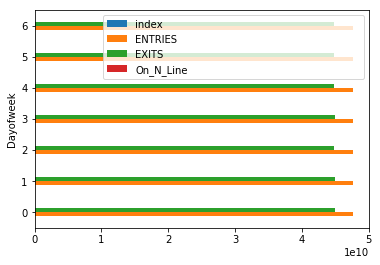

In [89]:
df.date = pd.to_datetime(df.date)
df['Dayofweek'] = df.date.dt.dayofweek
grouped = df.groupby('Dayofweek').sum()
grouped.plot(kind = 'barh')